# Chapter 6: Advanced Machine Learning


### 6.2.1 Developing a Gradient Descent Algorithm for Linear Regression Model

#### 6.2.1.1 Loading the dataset

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sales_df = pd.read_csv( 'Advertising.csv' )
# Print first few records
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### 6.2.1.2 Set X and Y Variable

In [2]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

#### 6.2.1.3 Standardize X & Y

In [3]:
Y = np.array( (Y - Y.mean() ) / Y.std() )
X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(), 
            axis = 0 )

#### 6.2.1.4 Implementing the Gradient Descent Algorithm

**Method 1: Random Initialization the bias and weights**

In [4]:
import random

#dim - is the number of weights to be initialized besides the bias
def initialize( dim ):
    # For reproducible results, the seed is set to 42.
    # Reader can comment the following two lines 
    # and try other initialization values.
    np.random.seed(seed=42)    
    random.seed(42) 
    #Initialize the bias
    b = random.random()
    #Initialize the weights.      
    w = np.random.rand( dim ) 
    
    return b, w

In [5]:
b, w = initialize( 3 )
print( "Bias: ", b, " Weights: ", w )

Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]


**Method 2: Predict Y values from the bias and weights**

In [6]:
# Inputs: 
# b - bias
# w - weights
# X - the input matrix

def predict_Y( b, w, X ):
    return b + np.matmul( X, w )

In [7]:
b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
Y_hat[0:10]

0    3.231496
1    1.707849
2    2.824761
3    2.753090
4    0.924486
5    3.171365
6    0.622344
7   -0.349354
8   -2.313095
9   -0.768030
dtype: float64

**Method 3: Calculate the cost function: MSE**

In [8]:
import math

# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost( Y, Y_hat ):
    # Calculating the residuals from taking difference between actual and predicted values
    Y_resid = Y - Y_hat
    # Matrix multiplication with itself will give the square values
    # Then taking the sum and dividing by number of examples to calculate mean
    return np.sum( np.matmul( Y_resid.T, Y_resid ) ) / len( Y_resid )

In [9]:
b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
get_cost( Y, Y_hat )

1.5303100198505901

#### Method 4: Update the bias and weights 

In [10]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):
    
    #gradient of bias
    db = (np.sum( y_hat - y ) * 2) / len(y)
    #gradient of weights    
    dw = (np.dot( ( y_hat - y ), x ) * 2 ) / len(y)
    #update bias
    b_1 = b_0 - learning_rate * db
    #update beta
    w_1 = w_0 - learning_rate * dw
    
    #return the new bias and beta values
    return b_1, w_1

In [11]:
b, w = initialize( 3 )
print( "After Initialization - Bias: ", b, " Weights: ", w )
Y_hat = predict_Y( b, w, X)
b, w = update_beta( X, Y, Y_hat, b, w, 0.01 )
print( "After first update - Bias: ", b, " Weights: ", w )

After Initialization - Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261  Weights:  [0.38079093 0.9376953  0.71484883]


#### 6.2.1.5 Finding the optimal bias and weights

In [12]:
def run_gradient_descent( X, 
                          Y,
                          alpha = 0.01, 
                          num_iterations = 100):

    # Initialize the bias and weights
    b, w = initialize( X.shape[1] )

    iter_num = 0
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    result_idx = 0

    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calculate predicted value of y
        Y_hat = predict_Y( b, w, X )
        # Calculate the cost
        this_cost = get_cost( Y, Y_hat )
        # Save the previous bias and weights
        prev_b = b
        prev_w = w
        # Update and calculate the new values of bias and weights   
        b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)

        # For every 10 iterations, store the cost i.e. MSE
        if( iter_num % 10 == 0 ):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]        
            result_idx = result_idx + 1

        iter_num += 1
        
    print( "Final estimate of b and w: ", b, w )   
    
    #return the final bias, weights and the cost at the end 
    
    return gd_iterations_df, b, w     

In [13]:
gd_iterations_df, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 200 )

Final estimate of b and w:  0.42844895817391454 [0.48270238 0.75265969 0.46109174]


In [14]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


#### 6.2.1.6 Plotting the cost function against the iterations 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

Text(0.5, 0, 'Cost or MSE')

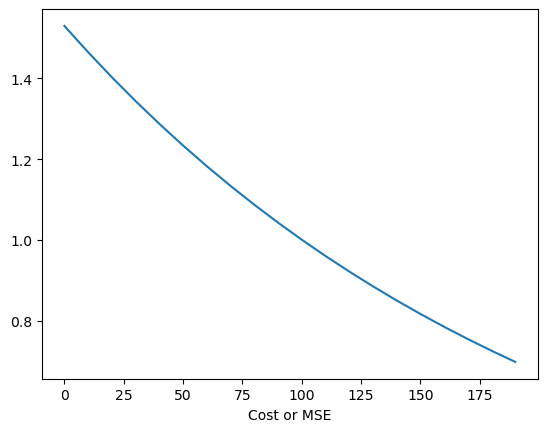

In [16]:
plt.plot( gd_iterations_df['iteration'], gd_iterations_df['cost'] );
plt.xlabel("Number of iterations")
plt.xlabel("Cost or MSE")

In [17]:
print( "Final estimates of b and w: ", b, w )

Final estimates of b and w:  0.42844895817391454 [0.48270238 0.75265969 0.46109174]


In [18]:
alpha_df_1, b, w = run_gradient_descent( X, Y, alpha = 0.01, num_iterations = 2000 )

Final estimate of b and w:  -5.5248438465247556e-17 [ 0.75306591  0.53648155 -0.00433069]


What happens if we change the learning parameter and use smaller value e.g. 0.001.

In [19]:
alpha_df_2, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 2000 )

Final estimate of b and w:  0.01166469555693021 [0.74315125 0.52779959 0.01171703]


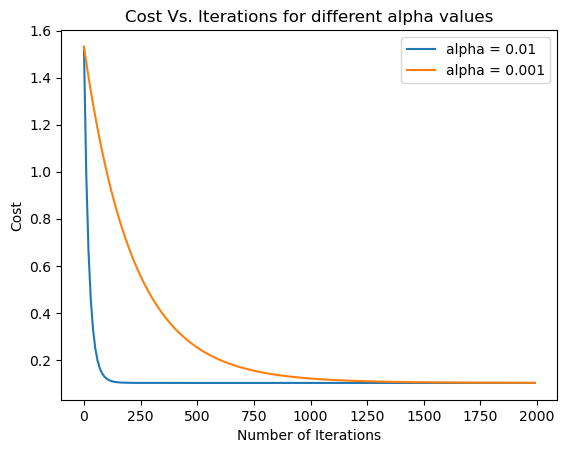

In [20]:
plt.plot( alpha_df_1['iteration'], alpha_df_1['cost'], label = "alpha = 0.01" );
plt.plot( alpha_df_2['iteration'], alpha_df_2['cost'], label = "alpha = 0.001"  );
plt.legend()
plt.ylabel('Cost');
plt.xlabel('Number of Iterations');
plt.title('Cost Vs. Iterations for different alpha values');

## 6.3 *scikit-learn* Library for Machine Learning

### 6.3.1 Steps for Building Machine Learning Models

#### 6.3.1.1  Splitting dataset into train and test datasets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                          sales_df[["TV", "Radio", "Newspaper"]],
                                          sales_df.Sales,
                                          test_size=0.3,
                                          random_state = 42 ) # Seed value of 42 for reproducibility

In [22]:
len( X_train )

140

In [23]:
len( X_test )

60

#### 6.3.1.2  Building Linear Regression model with train dataset

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
## Initializing the model
linreg = LinearRegression()
# Fitting training data to the model
linreg.fit( X_train, y_train )

LinearRegression()

In [26]:
linreg.intercept_

2.7089490925159065

In [27]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [28]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.04405928095746519),
 ('Radio', 0.19928749689893963),
 ('Newspaper', 0.006882452222275511)]

#### 6.3.1.3 Making prediction on test set

In [29]:
# Predicting the y value from the test set
y_pred = linreg.predict( X_test )

In [30]:
# Creating a DataFrame with three columns named actual, predicted and residuals to store
# the respective values
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )
# Randomly showing the 10 observations from the DataFrame
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


#### 6.3.1.4 Measuring Accuracy

In [31]:
## Importing metrics from sklearn
from sklearn import metrics

##### R-Squared Value

In [32]:
## y_train contain the actual value and the predicted value is returned from
# predict() method after passing the X values of the training data.
r2 = metrics.r2_score( y_train, linreg.predict(X_train) )
print("R Sqaured: ", r2)

R Sqaured:  0.9055159502227753


##### RMSE

In [33]:
# y_pred contains predicted value of test data
mse = metrics.mean_squared_error( y_test, y_pred )

In [34]:
# Taking square root of MSE and then round off to two decimal values
rmse = round( np.sqrt(mse), 2 )
print("RMSE: ", rmse)

RMSE:  1.95


### 6.3.2 Bias-Variance Trade-off

In [35]:
# Reading the file curve.csv and printing first few examples
curve = pd.read_csv( "curve.csv" )
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


Text(0, 0.5, 'y values')

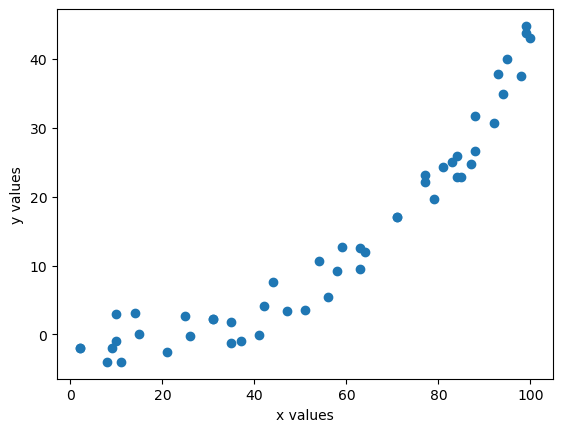

In [36]:
plt.scatter( curve.x, curve.y );
plt.xlabel("x values")
plt.ylabel("y values")

In [37]:
# Input
# degree - polynomial terms to be used in the model
def fit_poly( degree ):
    # calling numpy method polyfit
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    # draw the regression line after fitting the model
    sn.regplot( data = curve, x = 'x', y = 'y' )
    # Plot the actual x and y values
    return plt.plot( curve.x, curve.fit, label='fit' )

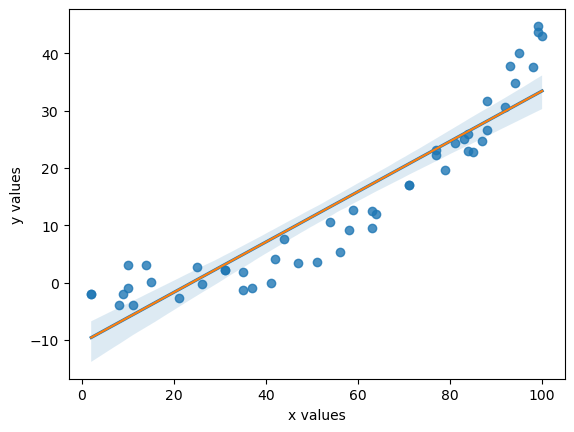

In [38]:
fit_poly( 1 );
## Plotting the model form and the data 
plt.xlabel("x values")
plt.ylabel("y values");

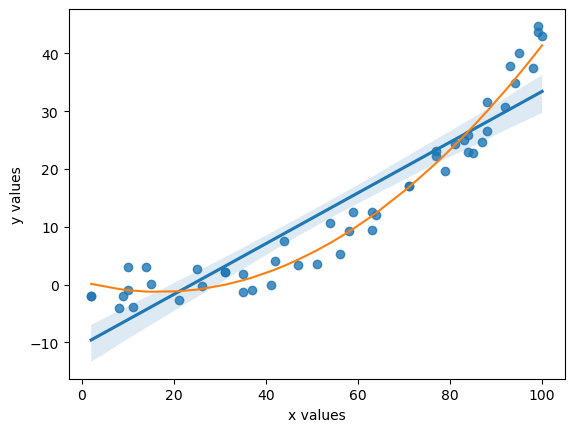

In [39]:
fit_poly( 2 );
plt.xlabel("x values")
plt.ylabel("y values");

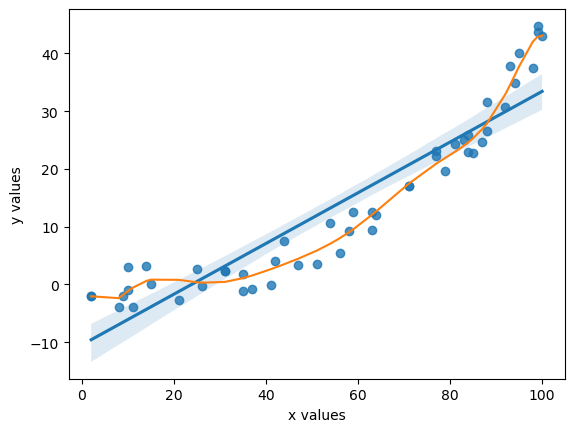

In [40]:
fit_poly( 10 );
plt.xlabel("x values")
plt.ylabel("y values");

In [41]:
# Split the dataset into 60:40 split into training and test set
train_X, test_X, train_y, test_y = train_test_split( curve.x, 
                                                    curve.y, 
                                                    test_size = 0.40, 
                                                    random_state = 100 )

# Define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

# Define a method to return the rmse given actual and predicted values.
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

# Iterate from degree 1 to 15
for i in range( 1, 15 ):
    # fitting model 
    p = np.polyfit( train_X, train_y, deg = i )
    # storing model degree and rmse on train and test set
    rmse_df.loc[i-1] = [ i, 
                        get_rmse( train_y, np.polyval( p, train_X ) ),
                        get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [42]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


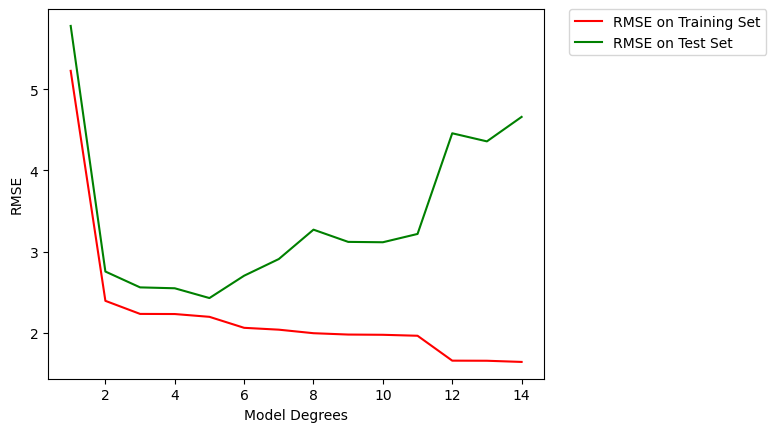

In [43]:
# plotting the rmse for training set in red color
plt.plot( rmse_df.degree, 
         rmse_df.rmse_train, 
         label='RMSE on Training Set', 
         color = 'r' )

# plotting the rmse for test set in green color
plt.plot( rmse_df.degree, 
         rmse_df.rmse_test, 
         label='RMSE on Test Set', 
         color = 'g' )
# Mention the legend
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2,
           borderaxespad=0.);
plt.xlabel("Model Degrees")
plt.ylabel("RMSE");

## 6.4 Advanced Regression Models

#### 6.4.1.1 Loading IPL Dataset

In [44]:
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' )
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [45]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
              'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 
              'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 
              'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 
              'AVE-BL', 'ECON', 'SR-BL']

In [46]:
# categorical_features is initialized with the categorical variable names.
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
#get_dummies() is invoked to return the dummy features. 
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features], 
                                        columns = categorical_features,
                                        drop_first = True )

In [47]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [48]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

#### 6.4.1.2 Standardize X & Y

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
## Initializing the StandardScaler
X_scaler = StandardScaler()
## Standardize all the feature columns
X_scaled = X_scaler.fit_transform(X)

## Standardizing Y explictly by subtracting mean and 
## dividing by standard deviation
Y = (Y - Y.mean()) / Y.std() 

#### 6.4.1.3 Split the dataset into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
                                          X_scaled,
                                          Y,
                                          test_size=0.2,
                                          random_state = 42)

#### 6.4.1.4 Build the model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [55]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [56]:
## The dataframe has two columns to store feature name 
## and the corresponding coefficient values
columns_coef_df = pd.DataFrame( { 'columns': ipl_auction_encoded_df.columns, 
                                  'coef': linreg.coef_ } )
## Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values( 'coef', ascending=False)

#### 6.4.1.5  Plotting the coefficient values

Text(0, 0.5, 'Features')

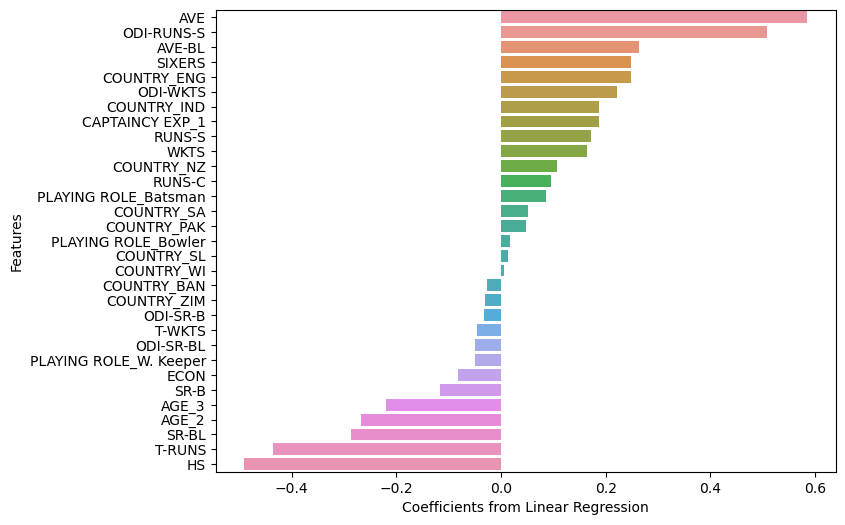

In [57]:
plt.figure( figsize = ( 8, 6 ))
## Creating a bar plot
sn.barplot(x="coef", y="columns", 
           data=sorted_coef_vals);
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")

#### 6.4.1.6 Calculate R-Squared value

In [58]:
from sklearn import metrics

# Takes a model as a parameter
# Prints the RMSE on train and test set 
def get_train_test_rmse( model ):
    # Predicting on training dataset
    y_train_pred = model.predict( X_train )
    # Compare the actual y with predicted y in the training dataset
    rmse_train = round(np.sqrt(metrics.mean_squared_error( y_train, y_train_pred )), 3)
    # Predicting on test dataset    
    y_test_pred = model.predict( X_test )
    # Compare the actual y with predicted y in the test dataset
    rmse_test = round(np.sqrt(metrics.mean_squared_error( y_test, y_test_pred )), 3)
    print( "train: ", rmse_train, " test:", rmse_test )

In [59]:
get_train_test_rmse( linreg )

train:  0.679  test: 0.749


### 6.4.2 Applying Regularization

### 6.4.2.1 Ridge Regression

In [60]:
# Importing Ridge Regression 
from sklearn.linear_model import Ridge

# Applying alpha = 1 and running the algorithms for maximum of 500 iterations
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit( X_train, y_train )

Ridge(alpha=1, max_iter=500)

In [61]:
get_train_test_rmse( ridge )

train:  0.68  test: 0.724


In [62]:
ridge = Ridge(alpha = 2.0, max_iter = 1000)
ridge.fit( X_train, y_train )
get_train_test_rmse( ridge )

train:  0.682  test: 0.706


### 6.4.2.2 Lasso Regression

In [63]:
# Importing Lasso Regression 
from sklearn.linear_model import Lasso

# Applying alpha = 0.01 and running the algorithms for maximum of 500 iterations
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit( X_train, y_train )

Lasso(alpha=0.01, max_iter=500)

In [64]:
get_train_test_rmse( lasso )

train:  0.688  test: 0.698


In [65]:
## Storing the feature names and coefficient values in the DataFrame
lasso_coef_df = pd.DataFrame( { 'columns': 
                                 ipl_auction_encoded_df.columns, 
                                 'coef': 
                                 lasso.coef_ } )

In [66]:
## Filtering out coefficients with zeros
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


### 6.4.2.3 Elastic Net Regression

In [67]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 1.01, l1_ratio = 0.001, max_iter = 500)
enet.fit( X_train, y_train )
get_train_test_rmse( enet )

train:  0.789  test: 0.665


## 6.5 Advanced Classification Algorithms

In [68]:
bank_df = pd.read_csv( 'bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [69]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


### 6.5.1 Dealing with imbalanced datasets

In [70]:
bank_df.subscribed.value_counts()

subscribed
no     4000
yes     521
Name: count, dtype: int64

In [71]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,
                                 random_state = 42) 

# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [72]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [73]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [74]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [75]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [76]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42 )

### 6.5.2 Logistic Regression model

#### 6.5.2.1 Building the model

In [77]:
from sklearn.linear_model import LogisticRegression

## Initializing the model
logit = LogisticRegression(random_state = 42)
## Fitting the model with X and Y values of the dataset
logit.fit( train_X, train_y)

LogisticRegression(random_state=42)

In [78]:
pred_y = logit.predict(test_X)

#### 6.5.2.2 Confusion Matrix

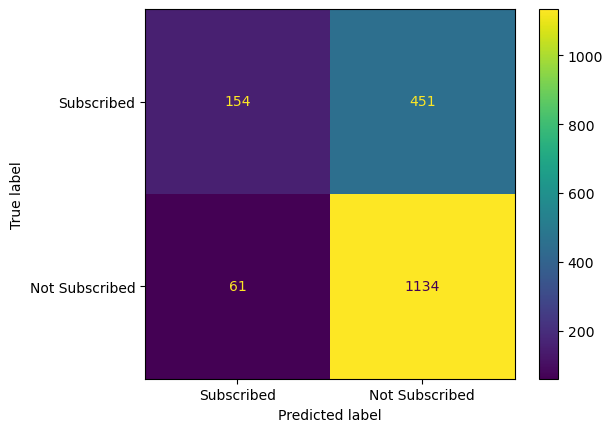

In [79]:
## Importing the metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix( test_y, pred_y, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Subscribed", "Not Subscribed"])
cm_plot.plot();

#### 6.5.2.3 Classification Report

In [80]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1195
           1       0.72      0.25      0.38       605

    accuracy                           0.72      1800
   macro avg       0.72      0.60      0.60      1800
weighted avg       0.72      0.72      0.67      1800



#### 6.5.2.4 ROC AUC Score

In [81]:
## Predicting the probability values for test cases
predict_proba_df = pd.DataFrame( logit.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.683751,0.316249
1,0.709181,0.290819
2,0.727917,0.272083
3,0.761370,0.238630
4,0.858810,0.141190


In [82]:
## Initializing the DataFrame with actual class lables
test_results_df = pd.DataFrame( { 'actual':  test_y } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [83]:
test_results_df.head(5)

,index,actual,chd_1
0,4162,0,0.316249
1,2419,1,0.290819
2,306,1,0.272083
3,352,0,0.238630
4,2237,0,0.141190


In [84]:
# Passing actual class labels and the predicted probability values to compute ROC AUC score.
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1  )
round( float( auc_score ), 2 )

0.7

In [85]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

def draw_roc( actual, probs ):

    # Obtain fpr and tprs for intermediate threshold values
    fpr, tpr, thresholds = roc_curve( actual, probs )        
    
    # Obtain the roc auc score
    roc_auc = auc(fpr, tpr)    
    
    rocauc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    rocauc_display.plot()
    
    return fpr, tpr, thresholds

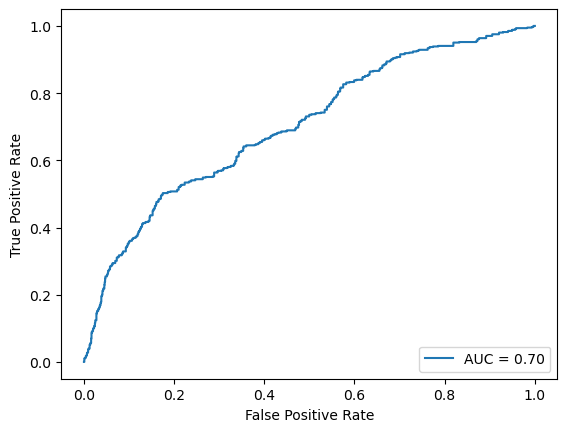

In [86]:
## Invoking draw_roc_curve with the logistic regresson model
_, _, _ = draw_roc( test_y, test_results_df['chd_1'] )

### 6.5.3 KNN Algorithm

In [87]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

## Initializing the classifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
## Fitting the model with the training set
knn_clf.fit( train_X, train_y )

KNeighborsClassifier()

#### 6.5.3.1 KNN Accuracy

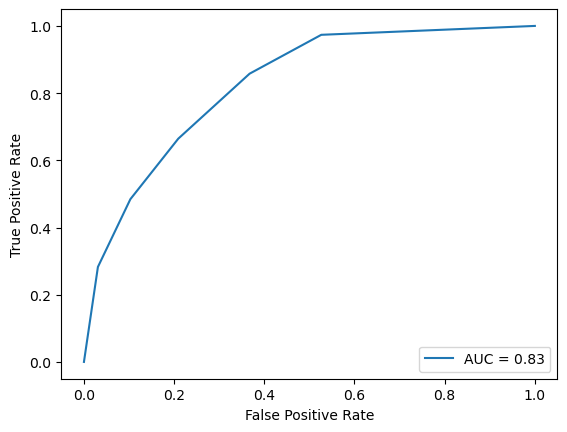

In [88]:
## Invoking draw_roc_curve with the KNN model
_, _, _ = draw_roc( test_y, knn_clf.predict_proba(test_X)[:,1] )

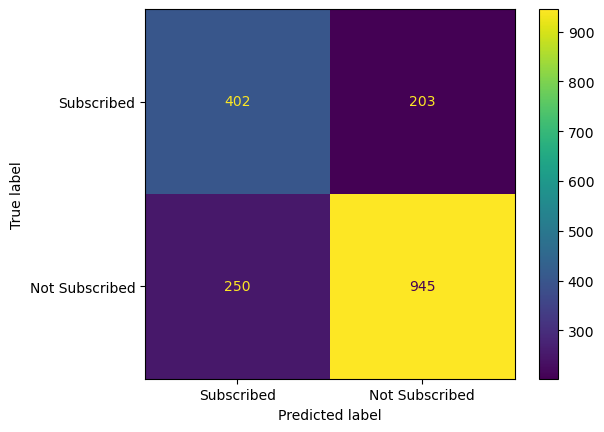

In [89]:
## Predicting on test set
pred_y = knn_clf.predict(test_X)
## Drawing the confusion matrix for KNN model 
cm = confusion_matrix( test_y, pred_y, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Subscribed", "Not Subscribed"])
cm_plot.plot();

In [90]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1195
           1       0.62      0.66      0.64       605

    accuracy                           0.75      1800
   macro avg       0.72      0.73      0.72      1800
weighted avg       0.75      0.75      0.75      1800



#### 6.5.3.2 GridSerach for most optimal parameters

In [91]:
## Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

## Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10), 
                     'metric': ['canberra', 'euclidean', 'minkowski']}]

## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')
## fit the search with training set
clf.fit(train_X, train_y )

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [92]:
clf.best_score_

0.828669800944777

In [93]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [94]:
pd.DataFrame(clf.cv_results_)[['param_metric', 
                               'param_n_neighbors', 
                               'mean_test_score', 
                               'std_test_score',
                               'rank_test_score']]

,param_metric,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,canberra,5,0.828670,0.013172,1
1,canberra,6,0.815241,0.013360,2
2,canberra,7,0.805592,0.012560,5
3,canberra,8,0.797000,0.016194,6
4,canberra,9,0.788056,0.015592,9
5,euclidean,5,0.811409,0.015874,3
6,euclidean,6,0.791862,0.015875,7
7,euclidean,7,0.776592,0.016892,10
8,euclidean,8,0.759720,0.018414,12
9,euclidean,9,0.745828,0.017441,14


## 6.5.4 Support Vector Machine

### 6.5.4.1 Visualizing SVM with only two features

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [96]:
bank_df = pd.read_csv( 'bank.csv')

In [97]:
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [98]:
bank_df['subscribed'] = bank_df.subscribed.map(lambda x: 1 if x == 'yes' else 0)

In [99]:
feature_cols = ['balance', 'current-campaign']

In [100]:
random_state = 121

bank_sample_df = pd.concat([bank_df[bank_df.subscribed == 1]
                            .sample(10,random_state = random_state),
                            bank_df[bank_df.subscribed == 0]
                            .sample(10,random_state = random_state)])

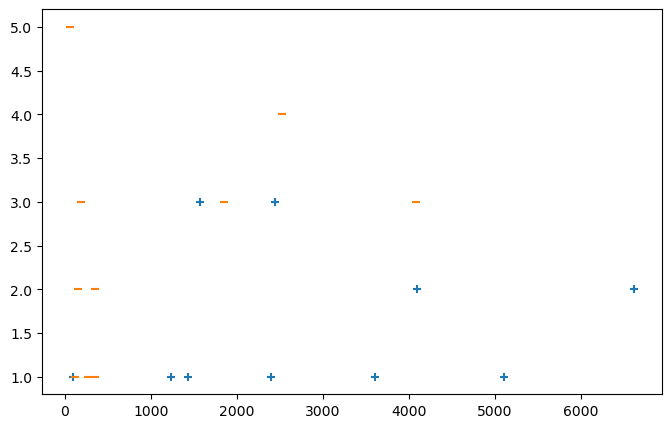

In [101]:
plt.figure(figsize=(8, 5))
plt.scatter(data = bank_sample_df[bank_sample_df.subscribed == 1],
            x = feature_cols[0],
            y = feature_cols[1], 
            marker = '+',
            cmap='coolwarm')
plt.scatter(data = bank_sample_df[bank_sample_df.subscribed == 0],
            x = feature_cols[0],
            y = feature_cols[1], 
            marker = '_',
            cmap='coolwarm');

In [102]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')

In [103]:
svc.fit( bank_sample_df[feature_cols], bank_sample_df.subscribed )

SVC(kernel='linear')

### 6.5.4.2 Running SVM on complete set of features

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_features = list(bank_df.columns)
x_features.remove('subscribed')

In [106]:
cat_featuers = ['job', 'marital', 'education', 'default', 'housing-loan', 'personal-loan']

In [107]:
encoded_bank_df = pd.get_dummies( bank_df, 
                                  columns = cat_featuers,
                                  drop_first = True)

In [108]:
bank_train_X, bank_test_X,  \
bank_train_Y, bank_test_Y = train_test_split( encoded_bank_df,
                                              bank_df['subscribed'],
                                              test_size = 0.3,
                                              random_state = 42 ) 

In [109]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = "balanced", 
                                     classes = np.unique(bank_train_X['subscribed']), 
                                     y = bank_train_X['subscribed'])

class_weights

array([0.56601073, 4.28726287])

In [110]:
class_weights = dict(zip(np.unique(bank_df['subscribed']), class_weights))
class_weights

{0: 0.5660107334525939, 1: 4.287262872628726}

In [111]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', class_weight=class_weights)

In [112]:
svc.fit( bank_train_X, bank_train_Y )

SVC(class_weight={0: 0.5660107334525939, 1: 4.287262872628726}, kernel='linear')

In [113]:
svc_pred_y = svc.predict(bank_test_X)

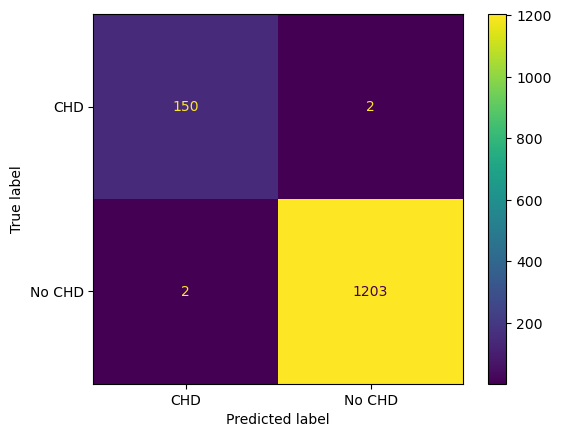

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(bank_test_Y, svc_pred_y, labels=[1,0])

ConfusionMatrixDisplay(cm, display_labels = ['CHD', 'No CHD']).plot();

In [115]:
from sklearn.metrics import classification_report


print(classification_report(bank_test_Y, svc_pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1205
           1       0.99      0.99      0.99       152

    accuracy                           1.00      1357
   macro avg       0.99      0.99      0.99      1357
weighted avg       1.00      1.00      1.00      1357



### 6.5.4 Ensemble Methods

### 6.5.5 Random Forest

#### 6.5.5.1 Buiding Random Forest Model 

In [145]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

## Initializing the Random Forest Classifier with max_dept and n_estimators
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10, random_state = 42)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

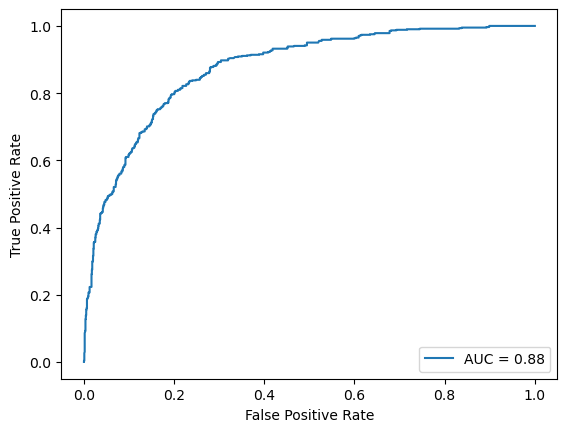

In [147]:
_, _, _ = draw_roc( test_y, radm_clf.predict_proba(test_X)[:,1] );

#### 6.5.5.2 Grid Search for Optimal Parameters

In [148]:
## Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],
                   'n_estimators': [10,20],
                   'max_features': ['sqrt', 'log2']}]

## Initializing the RF classifier
radm_clf = RandomForestClassifier()

## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                 tuned_parameters,
                 cv=5,
                 scoring='roc_auc')

## Fitting the training set
clf.fit(train_X, train_y )

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [163]:
np.round(clf.best_score_, 4)

0.9336

In [150]:
clf.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 20}

#### 6.5.5.3 Building the final model with optimal parameter values

In [157]:
## Initializing the Random Forest Mode with the optimal values
radm_clf = RandomForestClassifier(max_depth=15, 
                                  n_estimators=20, 
                                  max_features = 'sqrt',
                                  random_state = 42)
## Fitting the model with the training set
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=15, n_estimators=20, random_state=42)

#### 6.5.5.4 ROC AUC Score

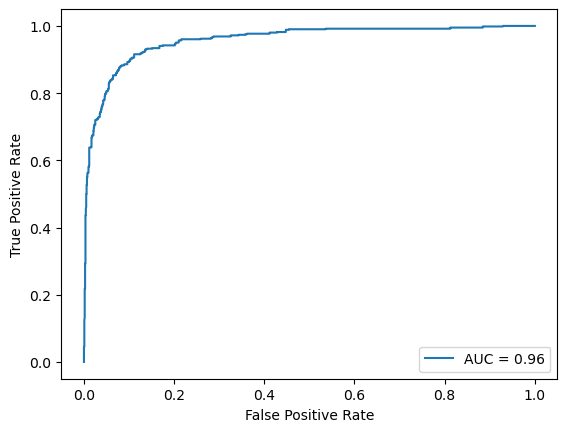

In [158]:
_, _, _ = draw_roc( test_y, radm_clf.predict_proba(test_X)[:,1] )

#### 6.5.5.5 Drawing the confusion matrix

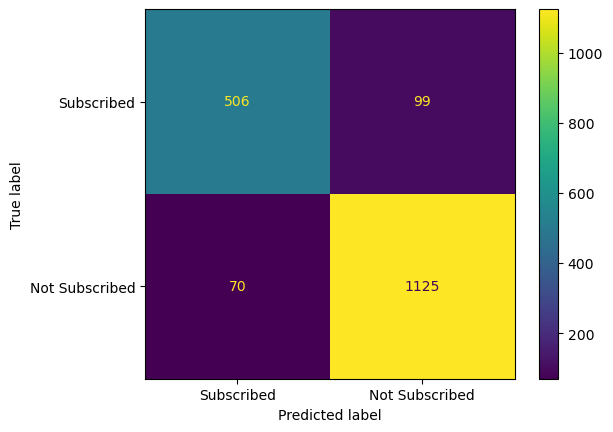

In [159]:
pred_y = radm_clf.predict( test_X )
## Drawing the confusion matrix for KNN model 
cm = confusion_matrix( test_y, pred_y, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Subscribed", "Not Subscribed"])
cm_plot.plot();

In [160]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1195
           1       0.88      0.84      0.86       605

    accuracy                           0.91      1800
   macro avg       0.90      0.89      0.89      1800
weighted avg       0.91      0.91      0.91      1800



####  6.5.5.6 Finding important features

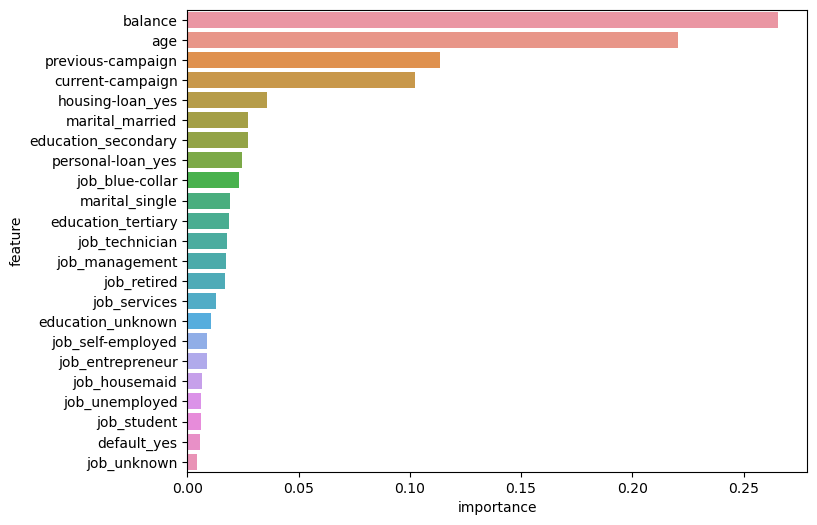

In [161]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns,
                               'importance': radm_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)

plt.figure(figsize=(8, 6))
# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

In [162]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.265386,26.538622
0,age,0.220517,48.590317
3,previous-campaign,0.113362,59.926522
2,current-campaign,0.102202,70.146742
21,housing-loan_yes,0.035826,73.729297
15,marital_married,0.027157,76.445000
17,education_secondary,0.027129,79.157923
22,personal-loan_yes,0.024620,81.619948
4,job_blue-collar,0.023333,83.953201
16,marital_single,0.019179,85.871145


### 6.5.6 Boosting

#### 6.5.6.1 Adaboost

In [164]:
## Importing Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

## Initializing logistic regression to use as base classifier
logreg_clf = LogisticRegression()

## Initializing adaboost classifier with 50 classifers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

## Fitting adaboost model to training set 
ada_clf.fit(train_X, train_y )

AdaBoostClassifier(estimator=LogisticRegression())

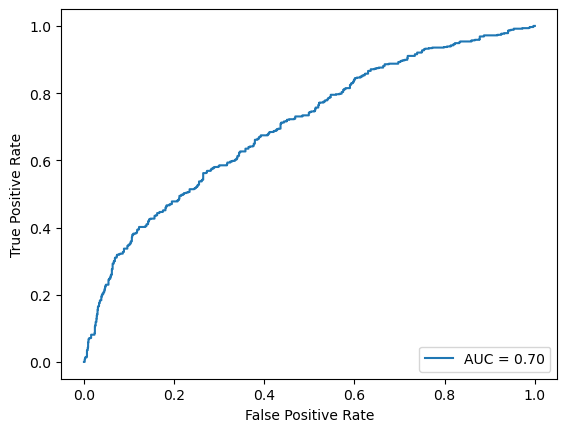

In [168]:
_, _, _ = draw_roc( test_y, ada_clf.predict_proba(test_X)[:,1] )

#### 6.5.6.2 Gradient Boosting

In [176]:
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

## Fitting gradient boosting model to training set 
gboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(max_depth=10, n_estimators=500)

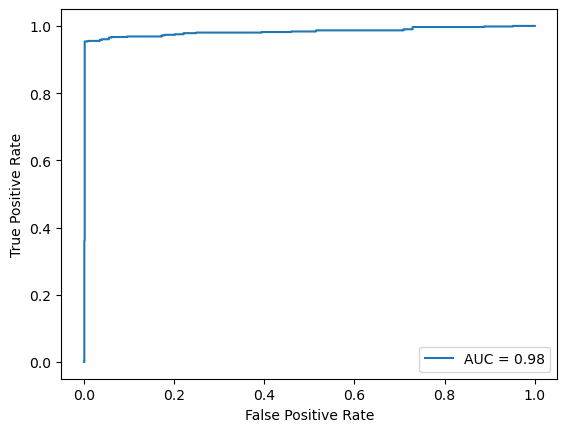

In [177]:
_, _, _ = draw_roc( test_y, gboost_clf.predict_proba(test_X)[:,1] )

In [178]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
cv_scores = cross_val_score( gboost_clf, train_X, train_y, cv = 10, scoring = 'roc_auc' )

In [179]:
print( cv_scores )
print( "Mean Accuracy: ", np.mean(cv_scores), " with standard deviation of: ",  np.std(cv_scores))

[0.95911314 0.96669142 0.96679382 0.98177117 0.98182237 0.96094388
 0.95520408 0.96441327 0.94683673 0.95556122]
Mean Accuracy:  0.9639151098469035  with standard deviation of:  0.010606504089446146


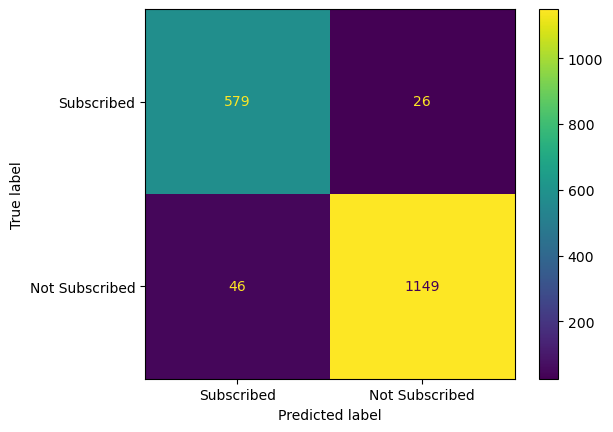

In [180]:
gboost_clf.fit(train_X, train_y )
pred_y = gboost_clf.predict( test_X )
## Drawing the confusion matrix for KNN model 
cm = confusion_matrix( test_y, pred_y, labels = [1,0] )
cm_plot = ConfusionMatrixDisplay(cm, display_labels = ["Subscribed", "Not Subscribed"])
cm_plot.plot();

In [181]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1195
           1       0.93      0.96      0.94       605

    accuracy                           0.96      1800
   macro avg       0.95      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800



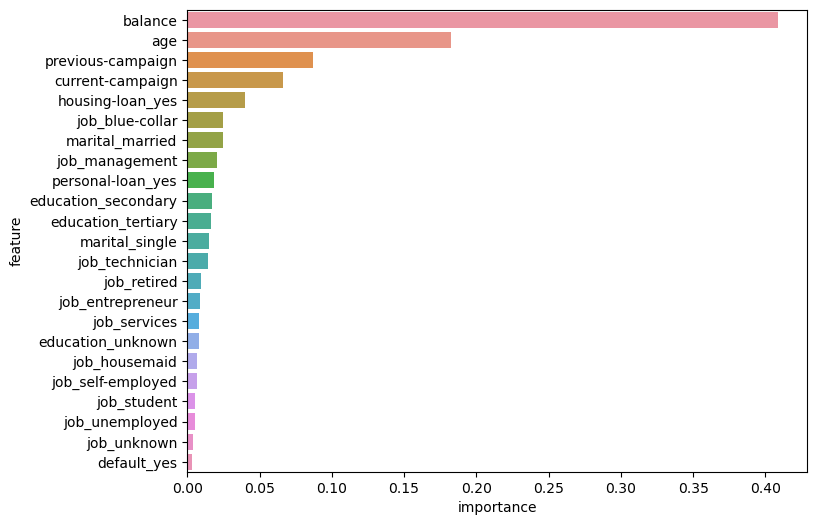

In [175]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns,
                               'importance': gboost_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)

plt.figure(figsize=(8, 6))
# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

#### 6.5.6.3 Stacking 

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [187]:
# Define base learners
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

In [188]:
# Fit the model
stacking_clf.fit(train_X, train_y)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=5)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [189]:
# Make predictions
y_pred = stacking_clf.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.2f}")

Stacking Model Accuracy: 0.79


In [190]:
# Evaluate individual base learners
for name, model in estimators:
    model.fit(train_X, train_y)
    y_pred_base = model.predict(test_X)
    acc_base = accuracy_score(test_y, y_pred_base)
    print(f"{name.upper()} Model Accuracy: {acc_base:.2f}")

LR Model Accuracy: 0.72
DT Model Accuracy: 0.74
KNN Model Accuracy: 0.75
